# LIGO - Gravitational Waves Detectability

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks")
from Utilities import plot_settings

Load downsampled data with balanced classes members

In [12]:
y = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\y_ds_100k.npy")

In [13]:
data = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\data_ds_100k.npy")

In [14]:
keys = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\keys_100k.npy")

Data needs to be scaled first

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
S = StandardScaler().fit_transform(data)

## Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from Utilities.Classify_vs import evaluate_classifier_over_features, visualize_classification_generic, plot_learning_curve
from sklearn.linear_model import LogisticRegression as LR

In [18]:
#S_train, S_test, y_train, y_test = train_test_split(S, y, test_size=0.33, random_state=42)
S_train, S_test, y_train, y_test = train_test_split(S, y, test_size=0.33, random_state=42)

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...
Computing predictions using first 14 features...


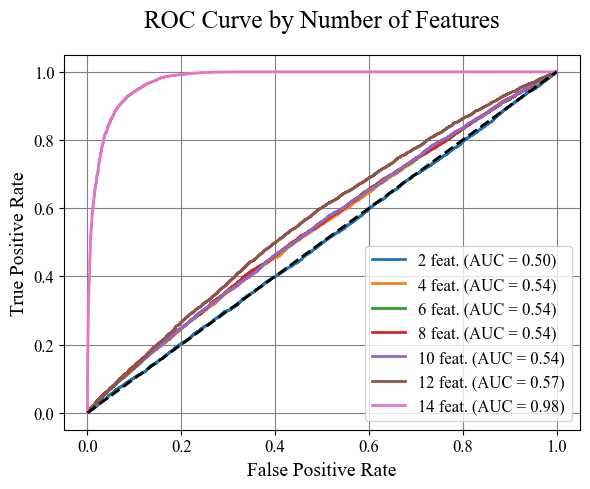

In [19]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, LR())

In [20]:
from sklearn.model_selection import learning_curve, KFold
custom_cv = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(result['best_classifier'], S, y, train_sizes=np.linspace(0.1, 1, 10), cv=custom_cv)

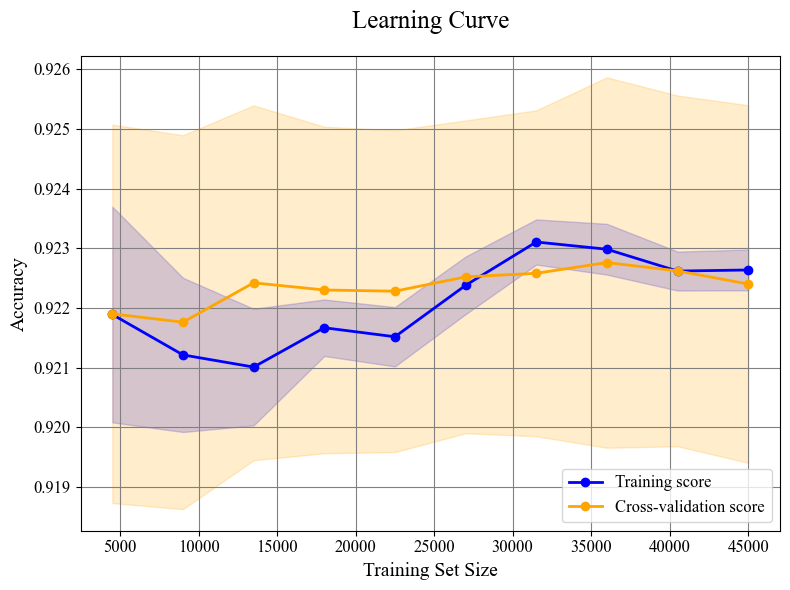

In [21]:
plot_learning_curve(train_sizes, train_scores, test_scores)

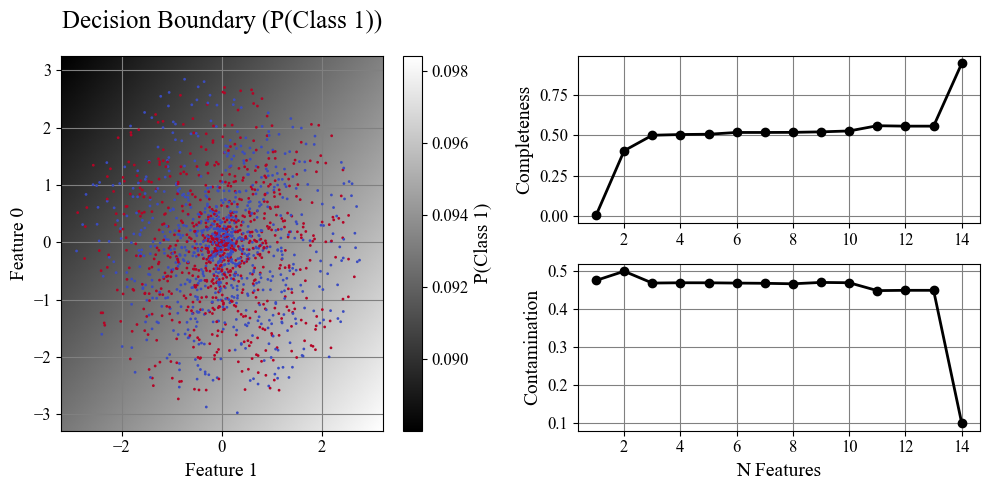

In [22]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], result['contamination'][:result['best_n_features']], f=10)

## Support Vector Machine

In [23]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True)

In [24]:
clf.fit(S_train, y_train)

SVC(probability=True)

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 'scale']
}

grid = GridSearchCV(clf, param_grid, cv=custom_cv, scoring='accuracy', n_jobs=-1)

In [26]:
grid.fit(S_train, y_train)

KeyboardInterrupt: 

In [55]:
grid.best_params_

{'C': 10, 'gamma': 'scale'}

In [ ]:
clf = SVC(kernel='linear', gamma=0.01, C=10, probability=True)

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...
Computing predictions using first 14 features...


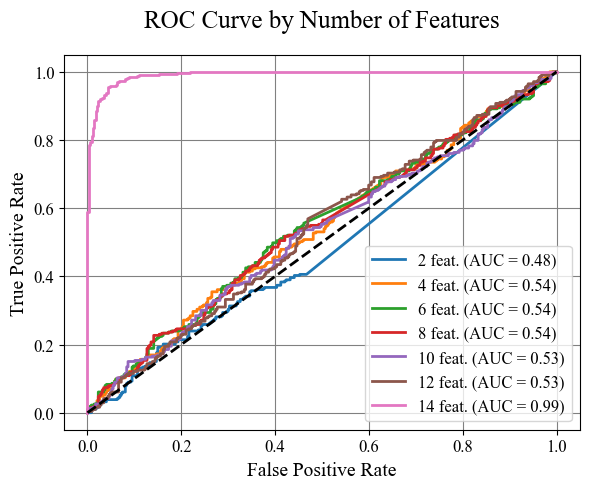

In [57]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, clf)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(result['best_classifier'], S, y,  train_sizes=np.linspace(0.1, 1, 10), cv=custom_cv)

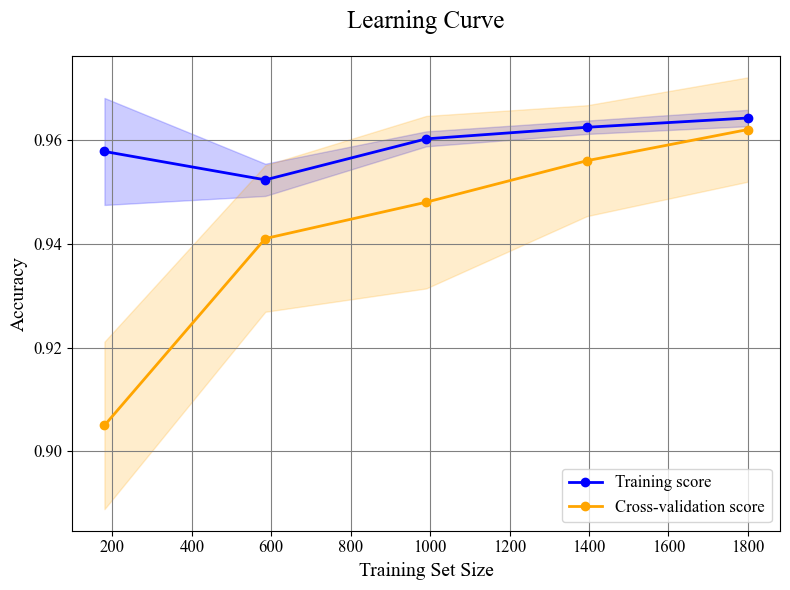

In [59]:
plot_learning_curve(train_sizes, train_scores, test_scores)

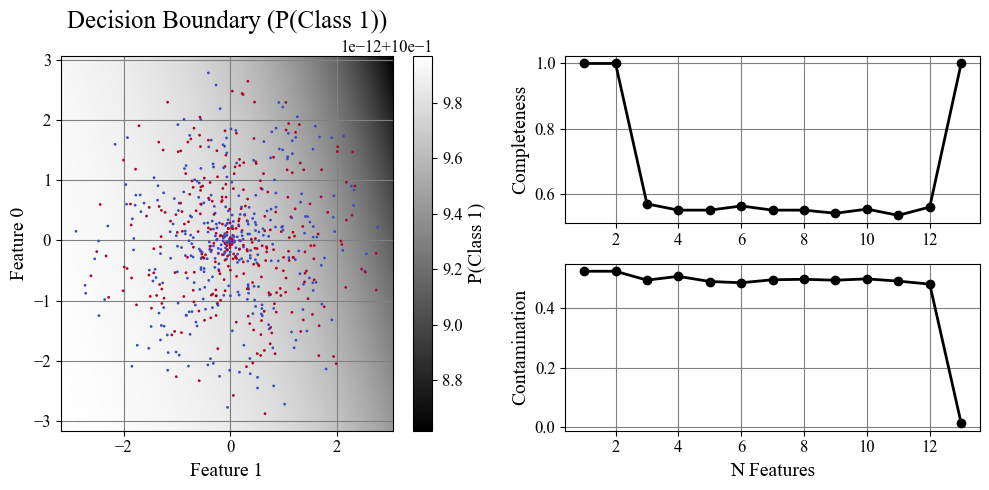

In [60]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 f=1, a=0, b=1)

## Decision Tree Regressor

In [ ]:
completeness_test = []
contamination_test = []
completeness_train = []
contamination_train = []

md_vals = np.arange(1,20)
for md in tqdm(md_vals):
    clf = DecisionTreeClassifier(random_state=1, max_depth=md,criterion='entropy')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    C = sklearn.metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = C.ravel()
    completeness_test.append(tp/(tp+fn))
    contamination_test.append(fp/(tp+fp))

    y_pred = clf.predict(X_train)
    C = sklearn.metrics.confusion_matrix(y_train, y_pred)
    tn, fp, fn, tp = C.ravel()
    completeness_train.append(tp/(tp+fn))
    contamination_train.append(fp/(tp+fp))

In [85]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [95]:
clf = DTC(criterion='entropy')

In [96]:
param_grid = {
    'max_depth': [1, 5, 20, 100]
    }

grid = GridSearchCV(clf, param_grid, cv=custom_cv, scoring='accuracy', n_jobs=-1)

In [97]:
grid.fit(S_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 20, 100]}, scoring='accuracy')

In [98]:
clf = DTC(max_depth=grid.best_params_['max_depth'])

In [99]:
train_sizes, train_scores, test_scores = learning_curve(
    clf, S, y, cv=custom_cv,
    scoring='r2', 
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

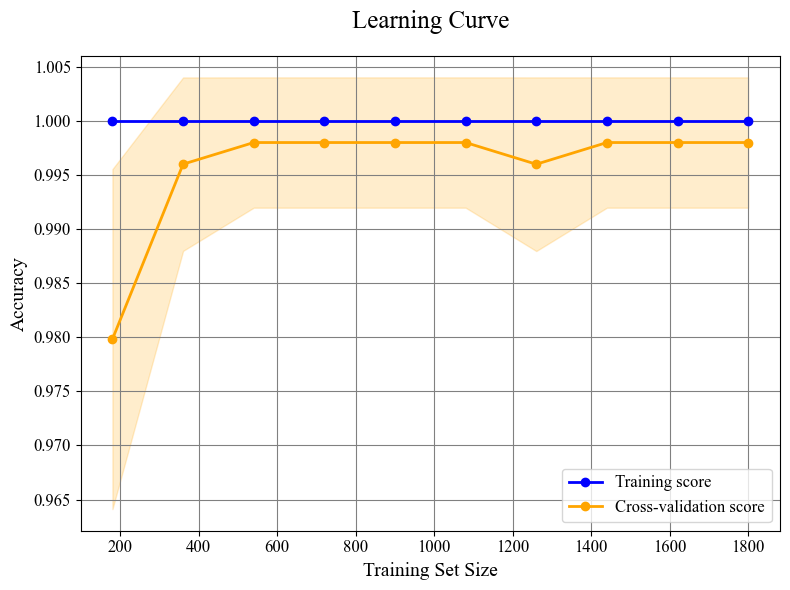

In [100]:
plot_learning_curve(train_sizes, train_scores, test_scores)

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...
Computing predictions using first 14 features...


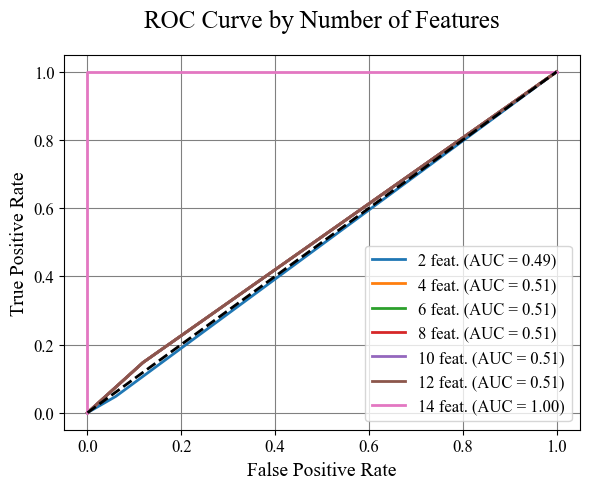

In [101]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, clf)

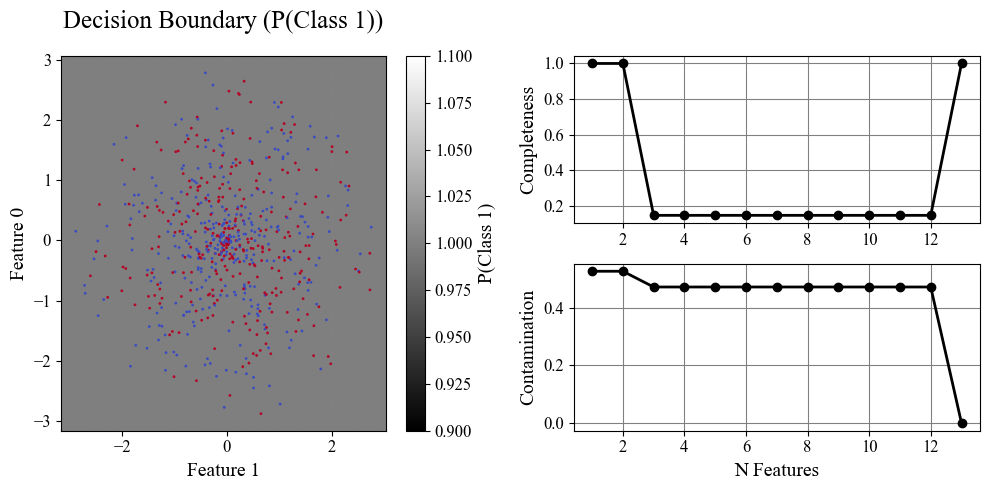

In [102]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 f=1, a=0, b=1)